<a href="https://colab.research.google.com/github/axelpuyo/liasd/blob/working/feature_map_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
clear all

In [19]:
## IMPORTS.
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

In [20]:
## MODEL PARAMETERS (STATIC).
n_dense1 = 1000
n_dense2 = 1000

In [21]:
## PREPROCESSING
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Make sure images have shape (28, 28, 1)
if x_train.ndim < 4:
  x_train = np.expand_dims(x_train, -1)
  x_test = np.expand_dims(x_test, -1)

# Make sure train/test split is representative.
print(x_train.shape, "input shape")
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

values, counts = np.unique(y_train, return_counts = True)
print('----training----')
print('labels : counts')
print('---------------')
for i in range(len(values)):
    print(' ', values[i], '   : ', counts[i])

values, counts = np.unique(y_test, return_counts = True)
print('----testing----')
print('labels : counts')
print('---------------')
for i in range(len(values)):
    print(' ', values[i], '   : ', counts[i])

num_classes = len(counts)

# Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

(50000, 32, 32, 3) input shape
50000 train samples
10000 test samples
----training----
labels : counts
---------------
  0    :  5000
  1    :  5000
  2    :  5000
  3    :  5000
  4    :  5000
  5    :  5000
  6    :  5000
  7    :  5000
  8    :  5000
  9    :  5000
----testing----
labels : counts
---------------
  0    :  1000
  1    :  1000
  2    :  1000
  3    :  1000
  4    :  1000
  5    :  1000
  6    :  1000
  7    :  1000
  8    :  1000
  9    :  1000


In [22]:
## MODEL BUILD
model = keras.Sequential(
    [
        keras.Input(shape=x_train[0].shape),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 2304)              0         
                                                                 
 dense_1 (Dense)             (None, 10)               

In [26]:
## HYPER-PARAMETERS.
batch_size = 128
epochs = 15

In [27]:
## OPTIMIZER AND LOSS.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [28]:
## MODEL TRAINING.
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=True, callbacks=None, validation_split=0.8)

Epoch 1/15
79/79 [==============================] - 41s 515ms/step - loss: 1.3925 - accuracy: 0.5080 - val_loss: 1.4239 - val_accuracy: 0.4974
Epoch 2/15
79/79 [==============================] - 38s 486ms/step - loss: 1.3001 - accuracy: 0.5402 - val_loss: 1.3906 - val_accuracy: 0.5065
Epoch 3/15
79/79 [==============================] - 38s 484ms/step - loss: 1.2561 - accuracy: 0.5572 - val_loss: 1.3551 - val_accuracy: 0.5185
Epoch 4/15
79/79 [==============================] - 37s 477ms/step - loss: 1.1955 - accuracy: 0.5836 - val_loss: 1.3178 - val_accuracy: 0.5362
Epoch 5/15
79/79 [==============================] - 37s 477ms/step - loss: 1.1601 - accuracy: 0.6000 - val_loss: 1.3070 - val_accuracy: 0.5427
Epoch 6/15
79/79 [==============================] - 38s 480ms/step - loss: 1.1167 - accuracy: 0.6085 - val_loss: 1.2644 - val_accuracy: 0.5619
Epoch 7/15
79/79 [==============================] - 37s 475ms/step - loss: 1.0692 - accuracy: 0.6239 - val_loss: 1.2338 - val_accuracy: 0.5717

In [ ]:
## SAVE TRAINED MODEL.
from google.colab import drive
drive.mount('/content/gdrive')
work_dir = f'/content/gdrive/My Drive/Colab Notebooks/Data'
model.save(work_dir)

conv2d_2 (3, 3, 3, 64)


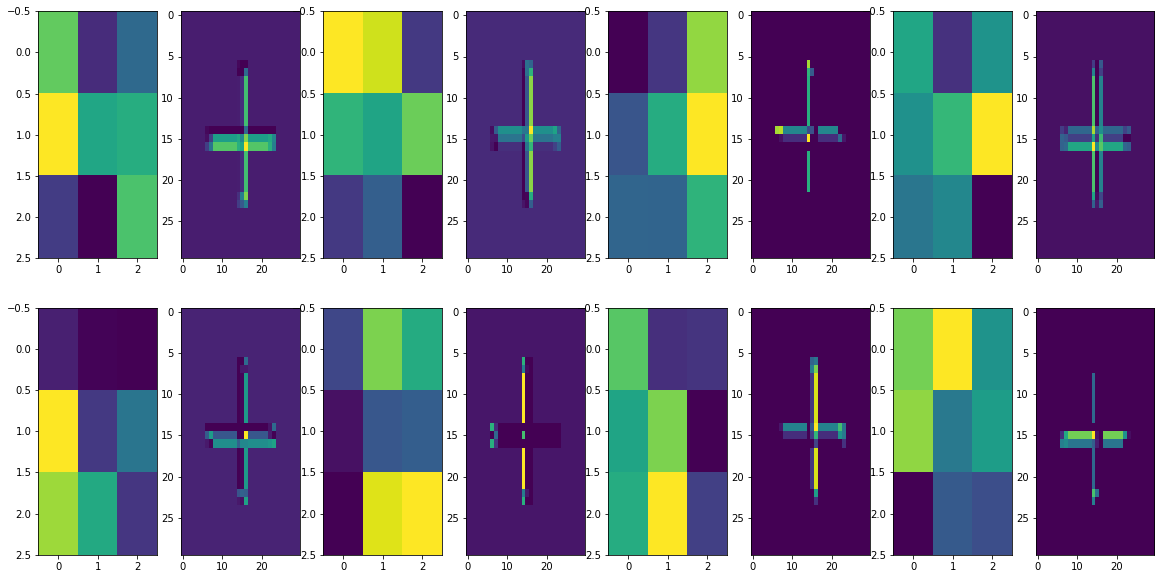

conv2d_3 (3, 3, 64, 64)


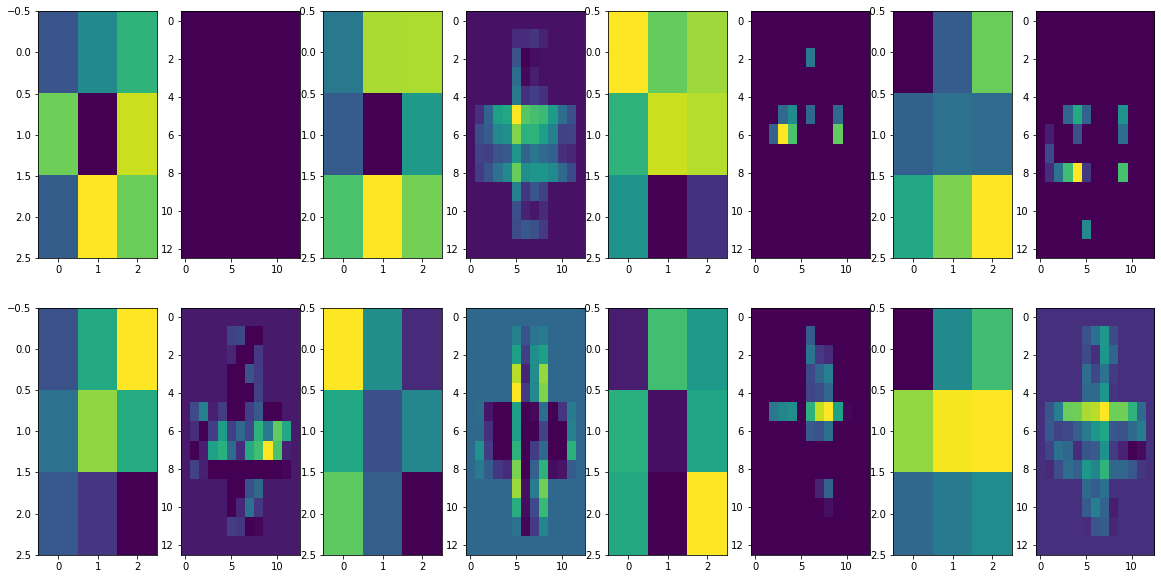

In [54]:
## FEATURE MAPS VISUALIZATION.
from keras.models import Model
# Construction of basic image, to see what happens to it at every stage of the model.
im = np.zeros(x_train[0].shape)
c = int(np.floor(x_train[0].shape[1] / 2))
im[8:24, c, 1] = 1 # Je lui donne une barre verte.
im[c, 8:24, 1] = 1
if im.ndim < 4:
  im = np.expand_dims(im, axis=0)

# plt.imshow(np.squeeze(im[..., -1]), cmap='gray', aspect='auto')
# plt.colorbar()
# plt.show()

for i in range(len(model.layers)):
  if 'conv' not in model.layers[i].name:
    continue
  model2 = Model(inputs=model.inputs, outputs=model.layers[i].output)

  kernels, biases = model.layers[i].get_weights()
  k_min, k_max = kernels.min(), kernels.max()
  kernels = (kernels - k_min) / (k_max - k_min)
  feature_map = model2.predict(im)

  # f_map = np.squeeze(feature_map[..., 0])
  # kernel = np.squeeze(kernels[..., 0, 0]) # Ce zéro est suspect, on ne sait pas si ce feature map vient forcément du 1er input du convolutional layer d'avant.

  # print(model.layers[i].name, kernels.shape)
  # plt.figure(figsize=(20,5))
  # plt.subplot(131)
  # plt.imshow(np.squeeze(im), aspect='auto')
  # plt.colorbar()
  # plt.subplot(132)
  # plt.imshow(kernel, aspect='auto')
  # plt.colorbar()
  # plt.subplot(133)
  # plt.imshow(f_map, aspect='auto')
  # plt.colorbar()
  # plt.show()
  # Visualize all feature maps and corresponding filters.
  num_maps = feature_map.shape[-1]
  rows = int(np.floor(np.sqrt(num_maps)))
  idx = 1
  plt.figure(figsize=(20, 10))
  print(model.layers[i].name, kernels.shape)
  for j in range(0, num_maps, 8):
    # print(num_maps, idx, rows*2*rows)
    f_map = np.squeeze(feature_map[..., j])
    kernel = np.squeeze(kernels[..., 0, j]) # Ce zéro est suspect : revoir les shape des kernels.

    plt.subplot(2, 8, idx)
    plt.imshow(kernel, aspect='auto')
    plt.subplot(2, 8, idx + 1)
    plt.imshow(f_map, aspect='auto')

    idx += 2
  plt.show()
  